The data dictionary provided with data is as follows:

dateCrawled - When this ad was first crawled. All field-values are taken from this date.

name - Name of the car.

seller - Whether the seller is private or a dealer.

offerType - The type of listing

price - The price on the ad to sell the car.

abtest - Whether the listing is included in an A/B test.

vehicleType - The vehicle Type.

yearOfRegistration - The year in which the car was first registered.

gearbox - The transmission type.

powerPS - The power of the car in PS.

model - The car model name.

kilometer - How many kilometers the car has driven.

monthOfRegistration - The month in which the car was first registered.

fuelType - What type of fuel the car uses.

brand - The brand of the car.

notRepairedDamage - If the car has a damage which is not yet repaired.

dateCreated - The date on which the eBay listing was created.

nrOfPictures - The number of pictures in the ad.

postalCode - The postal code for the location of the vehicle.

lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings. You'll also become familiar with some of the unique benefits jupyter notebook provides for pandas.

Part 1

Read the autos.csv CSV file into pandas, and assign it to the variable name autos.
Try without specifying any encoding (which will default to UTF-8)
If you get an encoding error, try the next two most popular encodings (Latin-1 and Windows-1252) until you are able to read the file without error.
Create a new cell with just the variable autos and run this cell.
A neat feature of jupyter notebook is its ability to render the first few and last few values of any pandas object.
Use the DataFrame.info() and DataFrame.head() methods to print information about the autos dataframe, as well as the first few rows.

Part 2

Use the DataFrame.columns attribute to print an array of the existing column names.
Copy that array and make the following edits to columns names:
yearOfRegistration to registration_year
monthOfRegistration to registration_month
notRepairedDamage to unrepaired_damage
dateCreated to ad_created
The rest of the columnn names from camelcase to snakecase.
Assign the modified column names back to the DataFrame.columns attribute.
Use DataFrame.head() to look at the current state of the autos dataframe.

Part 3

Use DataFrame.describe() to look at descriptive statistics for all columns.
Write a markdown cell noting:
Any columns that have mostly one value that are candidates to be dropped
Any columns that need more investigation.
Any examples of numeric data stored as text that needs to be cleaned.
If you need to investigate any columns more, do so and write up any additional things you found.
You likely found that the price and odometer columns are numeric values stored as text. For each column:
Remove any non-numeric characters.
Convert the column to a numeric dtype.
Use DataFrame.rename() to rename the column to odometer_km.

Part 4

For each of the odometer_km and price columns:
Use the techniques above to explore the data
If you find there are outliers, remove them and write a markdown paragraph explaining your decision.
After you have removed the outliers, make some observations about the remaining values.

Part 5

Use the workflow we just described to calculate the distribution of values in the date_crawled, ad_created, and last_seen columns (all string columns) as percentages.
To include missing values in the distribution and to use percentages instead of counts, chain the Series.value_counts(normalize=True, dropna=False) method.
To rank by date in ascending order (earliest to latest), chain the Series.sort_index() method.
Write a markdown cell after each column exploration to explain your observations.
Use Series.describe() to understand the distribution of registration_year.

In [ ]:
Part 6

Decide which the highest and lowest acceptable values are for the registration_year column.
Write a markdown cell explaining your decision and why.
Remove the values outside those upper and lower bounds and calculate the distribution of the remaining values using Series.value_counts(normalize=True).
Write a markdown cell explaining your observations

# Part 7

Explore the unique values in the brand column, and decide on which brands you want to aggregate by.
You might want to select the top 20, or you might want to select those that have over a certain percentage of the total values (e.g. > 5%).
Remember that Series.value_counts() produces a series with index labels, so you can use Series.index attribute to access the labels, should you wish.
Write a short paragraph describing the brand data, and explaining which brands you've chosen to aggregate on.
Create an empty dictionary to hold your aggregate data.
Loop over your selected brands, and assign the mean price to the dictionary, with the brand name as the key.
Print your dictionary of aggregate data, and write a paragraph analyzing the results.

Part 8

Use the loop method from the last screen to calculate the mean mileage and mean price for each of the top brands, storing the results in a dictionary.
Convert both dictionaries to series objects, using the series constructor.
Create a dataframe from the first series object using the dataframe constructor.
Assign the other series as a new column in this dataframe.
Pretty print the dataframe, and write a paragraph analyzing the aggregate data.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("autos.csv", encoding="latin - 1")

In [18]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [19]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [20]:
df.drop(["name"],1,inplace = True)

In [21]:
df.shape

(50000, 19)

In [22]:
df.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [23]:
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(int)

In [24]:
df.head()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,privat,Angebot,5000,control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [34]:
df.dtypes

dateCrawled            datetime64[ns]
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
odometer                      float64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated                    object
nrOfPictures                    int64
lastSeen                       object
age                             int64
dtype: object

In [27]:
df.drop(["postalCode"],1,inplace=True)
df["odometer"] = df["odometer"].str.replace("km","").str.replace(",", "").astype(float)

In [29]:
df["age"] = 2020 - df["yearOfRegistration"]

In [31]:
import datetime as dt

In [33]:
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])

In [35]:
df["lastSeen"] = pd.to_datetime(df["lastSeen"])

In [37]:
# df["dateCrawled"] - df["lastSeen"]

In [40]:
df["now"] = pd.datetime.now()
df["age"] = df["now"] - df["dateCrawled"]

In [43]:
df.columns

Index(['dateCrawled', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'odometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'lastSeen', 'age', 'now'],
      dtype='object')

In [44]:
df["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

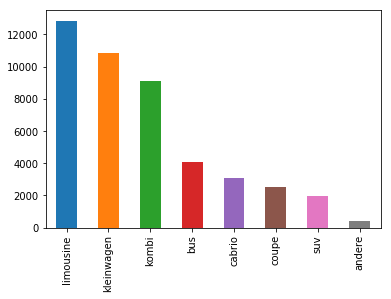

In [56]:
df["vehicleType"].value_counts().plot(kind = "bar")

In [81]:
pd.cut(df["price"], bins=10, labels=False).value_counts()

0    49990
9        5
8        1
3        1
1        1
Name: price, dtype: int64

In [75]:
df["price"].idxmax()

42221

In [76]:
df.drop(42221, inplace=True)

In [80]:
df[df['price']==12345678]

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen,age,now
27371,2016-03-09 15:45:47,privat,Angebot,12345678,control,NaN,2017,NaN,95,punto,150000.0,0,NaN,fiat,NaN,2016-03-09 00:00:00,0,2016-03-09 15:45:47,1431 days 17:05:07.195707,2020-02-09 08:50:54.195707
39377,2016-03-08 23:53:51,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000.0,6,NaN,volvo,nein,2016-03-08 00:00:00,0,2016-04-06 23:17:31,1432 days 08:57:03.195707,2020-02-09 08:50:54.195707
47598,2016-03-31 18:56:54,privat,Angebot,12345678,control,limousine,2001,manuell,101,vectra,150000.0,3,benzin,opel,nein,2016-03-31 00:00:00,0,2016-03-31 18:56:54,1409 days 13:54:00.195707,2020-02-09 08:50:54.195707


In [85]:
(df["price"].max() - df["price"].min())/10

1234567.8

In [86]:
df["price"].mean()

7293.891095643826

In [87]:
df["vehicleType"].value_counts()

limousine     12857
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicleType, dtype: int64

In [90]:
df.shape

(35047, 20)

In [89]:
df = df.dropna()

In [91]:
df.isnull().sum()

dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
odometer               0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
lastSeen               0
age                    0
now                    0
dtype: int64

In [92]:
l = [[1,2,3],[4,5,6], [7,8,9]]

In [93]:
l

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [94]:
import numpy as np


In [96]:
np.array(l).T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [97]:
import numpy as np 
a = np.arange(10) 

In [99]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
s = slice(2,7,2) 

In [104]:
print (a[s])

[2 4 6]


In [106]:
l = np.array(l)

In [108]:
type(l)

numpy.ndarray

In [110]:
l

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [112]:
l[1:,:]

array([[4, 5, 6],
       [7, 8, 9]])

In [114]:
l[1:, 1]

array([5, 8])

In [115]:
def upper(column, data):
    return data[column].str.upper()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen,age,now
0,2016-03-26 17:47:46,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,2016-04-06 06:45:54,1414 days 15:03:08.195707,2020-02-09 08:50:54.195707
1,2016-04-04 13:38:56,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,2016-04-06 14:45:08,1405 days 19:11:58.195707,2020-02-09 08:50:54.195707
2,2016-03-26 18:57:24,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,2016-04-06 20:15:37,1414 days 13:53:30.195707,2020-02-09 08:50:54.195707
3,2016-03-12 16:58:10,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,2016-03-15 03:16:28,1428 days 15:52:44.195707,2020-02-09 08:50:54.195707
4,2016-04-01 14:38:50,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,2016-04-01 14:38:50,1408 days 18:12:04.195707,2020-02-09 08:50:54.195707
7,2016-03-16 18:55:19,privat,Angebot,1990,control,limousine,1998,manuell,90,golf,150000.0,12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,2016-04-07 03:17:32,1424 days 13:55:35.195707,2020-02-09 08:50:54.195707
9,2016-03-16 13:47:02,privat,Angebot,590,control,bus,1997,manuell,90,megane,150000.0,7,benzin,renault,nein,2016-03-16 00:00:00,0,2016-04-06 10:46:35,1424 days 19:03:52.195707,2020-02-09 08:50:54.195707
12,2016-03-31 19:48:22,privat,Angebot,5299,control,kleinwagen,2010,automatik,71,fortwo,50000.0,9,benzin,smart,nein,2016-03-31 00:00:00,0,2016-04-06 14:17:52,1409 days 13:02:32.195707,2020-02-09 08:50:54.195707
13,2016-03-23 10:48:32,privat,Angebot,1350,control,limousine,1999,manuell,101,a3,150000.0,11,benzin,audi,nein,2016-03-23 00:00:00,0,2016-04-01 14:17:13,1417 days 22:02:22.195707,2020-02-09 08:50:54.195707
16,2016-03-16 14:59:02,privat,Angebot,350,test,kombi,1999,manuell,101,vectra,150000.0,5,benzin,opel,nein,2016-03-16 00:00:00,0,2016-03-18 05:29:37,1424 days 17:51:52.195707,2020-02-09 08:50:54.195707
